In [1]:
import osmnx as ox
import networkx as nx
from utils.getbox import get_box

In [2]:
file_path = 'demtest/huancui_with_dem.graphml'
G = ox.load_graphml(file_path)  # 第一步，获取道路数据

In [4]:
print('图信息')
print('边数量：', G.number_of_edges())
print('节点数量：', G.number_of_nodes())

图信息
边数量： 10159
节点数量： 4277


In [5]:
print('定义节点ID')
nodeId = 303448696

定义节点ID


In [6]:
print('输出节点的关联')
G[nodeId]

输出节点的关联


AdjacencyView({1235141883: {0: {'osmid': 425493848, 'name': '东城路', 'highway': 'residential', 'oneway': False, 'reversed': False, 'length': 12.985}}, 2831069926: {0: {'osmid': 278798173, 'oneway': True, 'lanes': '4', 'name': '世昌大道', 'highway': 'primary', 'reversed': False, 'length': 171.37, 'geometry': <LINESTRING (122.116 37.498, 122.117 37.498, 122.117 37.498, 122.118 37.498,...>}}, 1312121031: {0: {'osmid': 291583894, 'highway': 'residential', 'oneway': False, 'reversed': True, 'length': 28.383000000000003, 'geometry': <LINESTRING (122.116 37.498, 122.116 37.497, 122.116 37.497)>}}})

In [7]:
print('输出节点的信息')
print(G.nodes[nodeId])

输出节点的信息
{'y': 37.4975048, 'x': 122.1164298, 'street_count': 4, 'elevation': 13.0}


In [8]:
print('测试是否有高程数据......')
nodes = G.nodes()
flag = False
for nodeId in nodes:
    if('elevation' not in nodes[nodeId]):
        flag = True;
        break;
print('高程数据缺失') if(flag) else print('已添加高程数据')

测试是否有高程数据......
已添加高程数据


In [66]:
G.edges()

OutMultiEdgeDataView([(303448696, 1235141883), (303448696, 2831069926), (303448696, 1312121031), (303448698, 1265149772), (303448698, 1232264223), (303448699, 1591796107), (303448699, 9356538260), (303448703, 1261781546), (303448703, 1275012475), (303448703, 1275012498), (303448705, 2927083253), (303448705, 1275013312), (303448705, 2927083256), (303448706, 1678434156), (303448706, 1485045966), (303448706, 1275013315), (303448709, 1232807543), (303448709, 1232807690), (303448709, 1234236221), (303448709, 1232807633), (303448710, 1232807680), (303448710, 1460547808), (303448710, 1460547911), (303448716, 1275013322), (303448729, 1267601314), (303448729, 1312120584), (303448729, 1267601311), (303448739, 1267253198), (303448739, 2361481063), (303448739, 1234889264), (303448740, 1267253218), (303448740, 8141474579), (303448741, 2831585965), (303448741, 6946217791), (303448753, 1235141788), (303448753, 1672817967), (303448767, 1677711018), (303448767, 1485045935), (303448767, 1232827267), (30

In [9]:
G[303448696][1235141883][0]

{'osmid': 425493848,
 'name': '东城路',
 'highway': 'residential',
 'oneway': False,
 'reversed': False,
 'length': 12.985}

In [11]:
print('遍历边......')
edges = G.edges()

for (startNodeId, endNodeId) in edges:
    for index in G[startNodeId][endNodeId]:
        G[startNodeId][endNodeId][index]['elevation_difference'] = G.nodes[startNodeId]['elevation'] - G.nodes[endNodeId]['elevation']

print('已添加高程差数据')

遍历边......
已添加高程差数据


In [12]:
print(G[2823984023][2823984029][0])
print(G[2823984029][2823984023][0])

{'osmid': 277961923, 'highway': 'residential', 'oneway': False, 'reversed': False, 'length': 389.944, 'geometry': <LINESTRING (122.124 37.406, 122.124 37.406, 122.125 37.406, 122.125 37.406,...>, 'elevation_difference': 21.0}
{'osmid': 277961923, 'highway': 'residential', 'oneway': False, 'reversed': True, 'length': 389.944, 'geometry': <LINESTRING (122.128 37.407, 122.128 37.407, 122.126 37.406, 122.125 37.406,...>, 'elevation_difference': -21.0}


In [13]:
origin_point = (37.53184, 122.07468)  # 七公寓坐标
destination_point = (37.50542, 122.11810)  # 威高坐标
origin_node = ox.nearest_nodes(G, origin_point[1], origin_point[0])  # 获取O最邻近的道路节点
destination_node = ox.nearest_nodes(G, destination_point[1], destination_point[0])  # 获取D最邻近的道路节点
print('起点节点：', origin_node)
print('目的地节点：', destination_node)

起点节点： 2927083266
目的地节点： 2831070675


In [14]:
# 计算路径
route = nx.shortest_path(G, origin_node, destination_node, weight='length')  # 请求获取最短路径
distance = nx.shortest_path_length(G, origin_node, destination_node, weight='length')  # 并获取路径长度

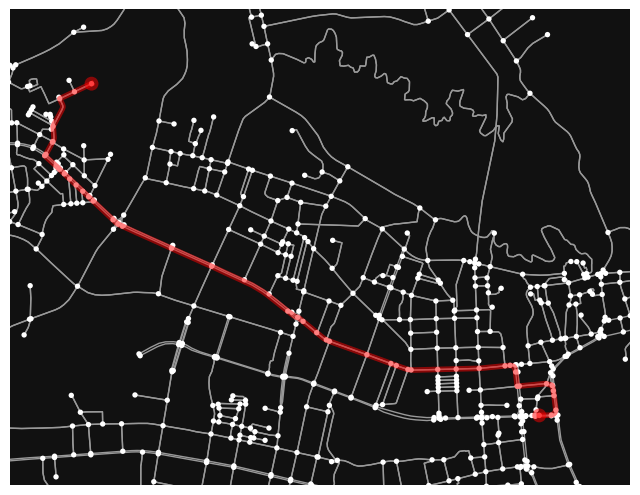

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [15]:
ox.plot_graph_route(G, route, bbox=get_box(origin_point, destination_point))  # 可视化结果

In [16]:
route

[2927083266,
 3957979069,
 2913053516,
 1313348783,
 6163713517,
 1275013312,
 303448705,
 2927083253,
 2927083251,
 2950270909,
 1677711042,
 2950270907,
 2950270906,
 2950270905,
 1678434156,
 1261781508,
 2919771757,
 1261781403,
 2919771733,
 1261781511,
 1261781416,
 1261781534,
 1232759578,
 2831071370,
 1461093931,
 2919769275,
 1234236221,
 303448709,
 1232807633,
 1460547911,
 303448710,
 1460547808,
 1232807688,
 1460547894,
 1232270258,
 1260480665,
 2825978321,
 2825978312,
 1260436568,
 629200027,
 1260480632,
 2927439209,
 2927438174,
 629199995,
 2304337597,
 2304337630,
 2831070675]